# Exercise for Lecture 14: Building Models
  
Having learned the basics of regression and classification, we will now use neural network to carry out these two tasks.

This notebook is not a tutorial, and will therefore only give you hints at how to solve the exercises. The results of this notebook will be part of your hand-in for this part of the course.

<font color='green'>
My paragraphs are shown in green, and my comments are indicated by ### instead of just one. Sometimes I will display things such as lists and dicts as pd.Series() or pd.DataFrame(), this is just to trigger Jupyter's nicer visualization.
Don't really care much for the custom CSS, so I disabled that cell.
</font> 

In [ ]:
#from IPython.core.display import HTML
#css_file = './31380.css'
#HTML(open(css_file, "r").read())

## Exercise 1: Regression

Import the combined gaia file from last exercise and split it into training set and test set. Use 3/4 of the data for training.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
%matplotlib inline

<font color='green'>
First I create a Series to contain my dataframes.
</font> 

In [2]:
# Import the gaia data here
data = pd.Series({})
data['raw'] = pd.read_csv("ex13_data/gaia.csv")
data['raw'].columns.values

array(['TIMESTAMP', 'WINDSPEED[m/s]', 'Unnamed: 2', 'RPM0[1/min]',
       'Unnamed: 4', 'RPM1[1/min]', 'Unnamed: 6', 'P[kW]', 'Unnamed: 8',
       'U[V]', 'Unnamed: 10', 'STATE[-]', 'Unnamed: 12'], dtype=object)

Plot the scatter plot of windspeed vs. power output. Remember that this is the underlying function we want to approximate.

<font color='green'>
I wanna work with cleaned data, so before plotting I just clean up the raw data by dropping NA.
</font> 


In [3]:
data['clean'] = data['raw'].dropna()

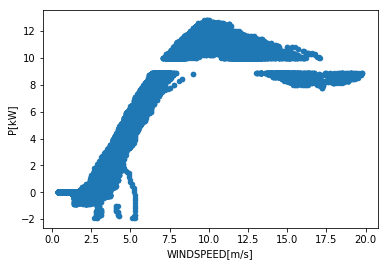

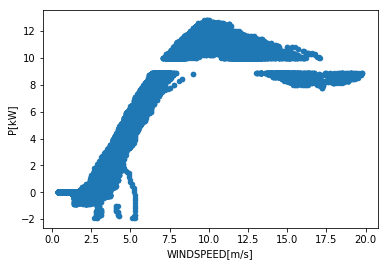

In [4]:
# Your scatter plot looks nice here
data['raw'].plot.scatter(x='WINDSPEED[m/s]', y='P[kW]');
data['clean'].plot.scatter(x='WINDSPEED[m/s]', y='P[kW]');

<font color='green'>
I can see that the two scatter plots look quite similar, but I will continue to work on the 'clean' data. Before proceeding, it might be interesting to look for other correlations in this dataset. We can visualize this using a heatmat, which basically just colors a correlation matrix. I want to look for decent correlations, so I set my highlighting threshold to 0.7
</font> 

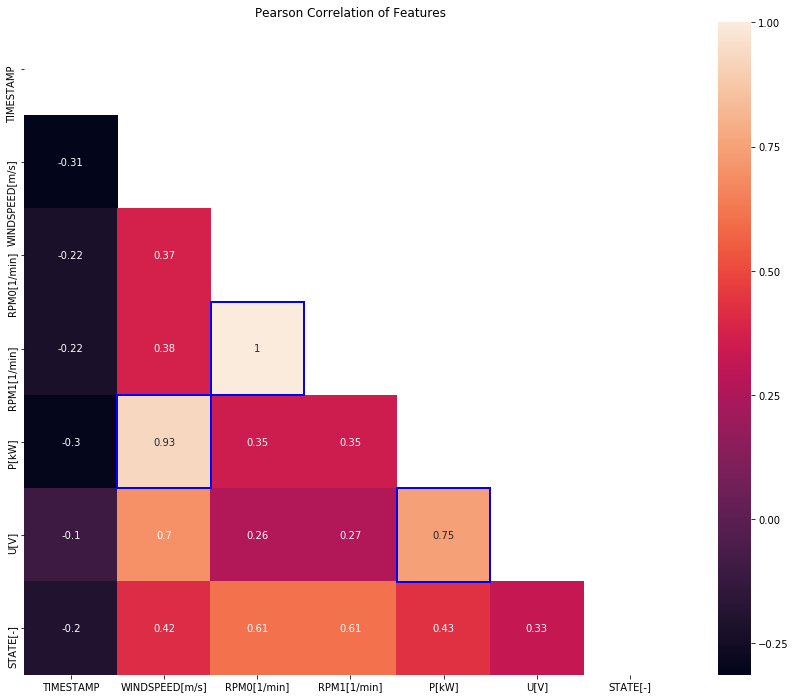

In [5]:
data['numerical_correlation'] = data['clean'].corr()
plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation of Features')

# Mask to remove diagonal and upper half
mask = np.zeros_like(data['numerical_correlation'], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data['numerical_correlation'],vmax=1,square=True,annot=True,mask=mask);


for cell in ax.texts:
    if (abs(float(cell.get_text())) > 0.7):
        ax.add_patch(Rectangle((int(cell.get_position()[0]-0.5), int(cell.get_position()[1]-0.5)), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

<font color='green'>
From the correlation matrix we can see that Windspeed and P correlate well. However, when we look at the scatterplot we can clearly see that the poweroutput follows the wind speed up to around 10, after which is starts falling again. This tells us that even though windspeed and power are highly correlated, any model we build based on a linear relationship will make incorrect predictions after wind speeds of 10. This implies that we should use a different approach.
</font> 

Try your hand at generating your first neural network. You can use the example from the lecture to get started. Choose different activation functions, learning rates, epochs and batch sizes. What can you say about the relationship between these values and their influence on the RMSE of your model prediction. Refer to the [Keras documentation](https://keras.io) in order to get an idea of the capabilities of the library.

<font color='green'>
Before I start training my neural network, I need to split my dataset into a test and training set. I use 3/4 of my data as training data.
</font> 


In [7]:
### Hi there! This is for some stuff related to running everything on a GPU, feel free to ignore for now
'''
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

### Adapted code for GPU
from keras import backend as K

with K.tf.device('/gpu:1'):
    from keras.models import Sequential
    from keras.layers import Dense, Activation
    from keras import optimizers
    K.set_session(K.tf.Session(config=K.tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)))
    model = Sequential()
    model.add(Dense(10, input_shape=(1,)))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('linear'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='mean_squared_error', optimizer=adam)
    model.fit(X_train.values,y_train.values, epochs = 80, batch_size=500, shuffle=False)
    y_pred = model.predict(X_test.values, batch_size = 1000)

''';


In [8]:
n_total = data['clean'].shape[0]
n_train = int(n_total / 4*3)
n_test = int(n_total / 4*1)
x_train = data['clean']['WINDSPEED[m/s]'].head(n_train)
x_test = data['clean']['WINDSPEED[m/s]'].tail(n_test)
y_train = data['clean']['P[kW]'].head(n_train)

<font color='green'>
After the split, we can run the model from the slides
</font>

In [9]:
# Code from slide
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model = Sequential()
model.add(Dense(10, input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(x_train.values, y_train.values, epochs = 80, batch_size=500, shuffle=False)
y_pred = model.predict(x_test.values, batch_size = 1000)

Using TensorFlow backend.


Epoch 1/80
299639/299639 [==============================] - 0s - loss: 5.5648     
Epoch 2/80
299639/299639 [==============================] - 0s - loss: 2.9421     
Epoch 3/80
299639/299639 [==============================] - 0s - loss: 2.8048     
Epoch 4/80
299639/299639 [==============================] - 0s - loss: 2.6868     
Epoch 5/80
299639/299639 [==============================] - 0s - loss: 2.5909     
Epoch 6/80
299639/299639 [==============================] - 0s - loss: 2.5151     
Epoch 7/80
299639/299639 [==============================] - 0s - loss: 2.4574     
Epoch 8/80
299639/299639 [==============================] - 0s - loss: 2.4158     - ETA: 0s - loss: 2.74
Epoch 9/80
299639/299639 [==============================] - 0s - loss: 2.3874     
Epoch 10/80
299639/299639 [==============================] - 0s - loss: 2.3665     
Epoch 11/80
299639/299639 [==============================] - 0s - loss: 2.3501     
Epoch 12/80
299639/299639 [==============================] - 0s

Try plotting the time series of your prediction and your y_test. Does it look as expected? How about a scatter plot of the windspeed vs. your prediction?

<font color='green'>
Before plotting I arrange my prediction data in a new dataframe called pdata(prediction data) - consider moving to main data somewhere...
</font>

In [11]:
pdata = pd.DataFrame({'x_test.values' : x_test.values, 'y_pred' : y_pred.flatten()})
prediction =  pd.Series(np.zeros(n_train))
pred = pd.Series(y_pred.tolist())
prediction.append(pred)
data['clean'].insert(loc=0, column='y_pred',value=prediction)

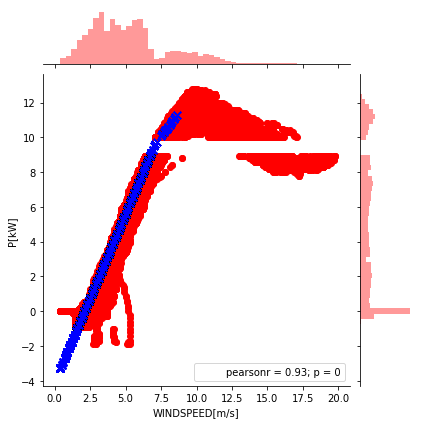

In [13]:
# Your pretty plots here
graph = sns.jointplot(x=data['clean']['WINDSPEED[m/s]'], y=data['clean']['P[kW]'], color='r')
graph.x = pdata['x_test.values']
graph.y = pdata['y_pred']
graph.plot_joint(plt.scatter, marker='x', c='b', s=50);

<font color='green'>
Looking at the predictions(blue) we can conclude that the prediction follows the general tendency of the data. It does seem strange that there are no predictions after around 8.5. The predictions are made based on the X_test.values, so we can investigate this data further.
</font>

In [15]:
X_test.max()

8.5999999999999996

<font color='green'>
We can see that the maximum value in X_test is 8.6. This means that the prediction didn't calculate values for those definitions, this may just be a coincidence when splitting the dataset into training and test. This should perhaps be redone at a later time. Finally we can visualize our neural network layers.
</font>

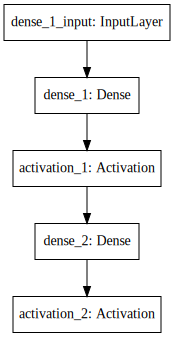

In [16]:
### To get visualization to work
### http://www.graphviz.org/Download_windows.php
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### from keras.utils import plot_model
### plot_model(model, to_file='model.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

If you want to try something with more dimensions, play with the solar data, or find a fun data set [here](https://archive.ics.uci.edu/ml/datasets.html)

## Exercise 2: Classification

In this exercise we will use the following set of data: https://archive.ics.uci.edu/ml/machine-learning-databases/00194/

Download the AllData.zip, unpack it and read the file Wall-following.names

Import the sensor_readings_XX.data files, and visualize the data with 2 sensor readings in a scatter plot.

* *Hint: Use the code snippet provided below*

In [17]:
# Import the files by using pandas here, notice that there's no header,
# so you will have to set the option header=None when importing
data = pd.Series({})
data['s2'] = pd.read_csv('data/sensor_readings_2.data', names = ['a','b','c'] )
data['s4'] = pd.read_csv('data/sensor_readings_4.data', names = ['a','b','c'])
data['s24'] = pd.read_csv('data/sensor_readings_24.data', names = ['a','b','c'])
data['s2'].head()

,a,b,c
0,1.687,0.445,Slight-Right-Turn
1,1.687,0.449,Slight-Right-Turn
2,1.687,0.449,Slight-Right-Turn
3,1.687,0.449,Slight-Right-Turn
4,1.687,0.449,Slight-Right-Turn


<font color='green'>
Note that I gave the columns headers called 'a', 'b' and 'c'. The names do not refer to anything, I just find it easier that way.

Since we have classified data we first convert this data into a one hot notation. We also create a dictionary to keep track of the mappings.
</font>

In [19]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
Y = data['s2']['c']
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
pd.Series(mapping)

Move-Forward         0
Sharp-Right-Turn     1
Slight-Left-Turn     2
Slight-Right-Turn    3
dtype: int64

<font color='green'>
Now we can contain the Y data in a dataframe, we name the columns based on the mapping from the encoder.
</font>

In [28]:
all_Y = pd.DataFrame(np_utils.to_categorical(encoded_Y), columns=['Move-Forward', 'Sharp-Right-Turn', 
                                                                  'Slight-Left-Turn','Slight-Right-Turn'])
#all_Y.head()

<font color='green'>
Let's plot the original data
</font>

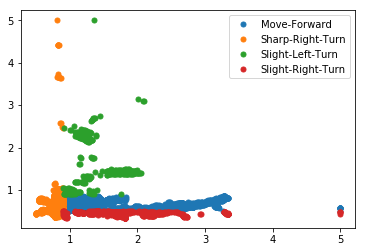

In [21]:
# Visualize here
data_2_sensors = data['s2'].groupby('c')

fig, ax = plt.subplots()
ax.margins(0.05) # A adds 5% padding to the autoscaling
for movement, sensor in data_2_sensors:
    ax.plot(sensor['a'], sensor['b'], marker='o', linestyle='', ms=5, label=movement)
ax.legend()

plt.show()

As in the previous exercise, create, train and tune a neural network classifier that allows the robot to decide which action it should take. Remember to split training set and test set. In the case of a classifier you must choose a different loss function. A popular one for classification is the categorical_crossentropy.

<font color='green'>
First we split the dataset into a training and testing dataset.
</font>

In [101]:
n_total = data['s2'].shape[0]
n_train = int(n_total / 4*3)
n_test = int(n_total / 4*1)

x_all = data['s2'][['a','b']]
x_train = data['s2'][['a','b']].head(n_train)
x_test = data['s2'][['a','b']].tail(n_test)
y_train = all_Y.head(n_train)

<font color='green'>
We can now create a train out models. Based on the data we know that the model should have: 2 inputs -> [4 hidden nodes] -> 4 outputs

inputs: 'a' and 'b' column from original dataset.
hidden nodes:
outputs: 'Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn', 'Slight-Right-Turn'

</font>

In [251]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu') )
model.add(Dense(4, activation='softmax'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam)
model.fit(x_train.values, y_train.values, epochs = 80, batch_size=500, shuffle=False)
y_pred = model.predict(x_test.values, batch_size = 1000)

Epoch 1/80
4092/4092 [==============================] - 0s - loss: 1.2628     
Epoch 2/80
4092/4092 [==============================] - 0s - loss: 1.2552     
Epoch 3/80
4092/4092 [==============================] - 0s - loss: 1.2481     
Epoch 4/80
4092/4092 [==============================] - 0s - loss: 1.2414     
Epoch 5/80
4092/4092 [==============================] - 0s - loss: 1.2351     
Epoch 6/80
4092/4092 [==============================] - 0s - loss: 1.2291     
Epoch 7/80
4092/4092 [==============================] - 0s - loss: 1.2234     
Epoch 8/80
4092/4092 [==============================] - 0s - loss: 1.2179     
Epoch 9/80
4092/4092 [==============================] - 0s - loss: 1.2127     
Epoch 10/80
4092/4092 [==============================] - 0s - loss: 1.2076     
Epoch 11/80
4092/4092 [==============================] - 0s - loss: 1.2028     
Epoch 12/80
4092/4092 [==============================] - 0s - loss: 1.1980     
Epoch 13/80
4092/4092 [==========================

In [291]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers



def baseline_model(loss_type):
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation='relu') )
    model.add(Dense(4, activation='softmax'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss=loss_type, optimizer=adam)
    model.fit(x_train.values, y_train.values, epochs = 80, batch_size=500, shuffle=False)
    y_pred = model.predict(x_test.values, batch_size = 1000)
    
    return y_pred

#y_pred = baseline_model('categorical_crossentropy')
y_pred = baseline_model('mean_squared_error')

Epoch 1/80
4092/4092 [==============================] - 0s - loss: 0.2130     
Epoch 2/80
4092/4092 [==============================] - 0s - loss: 0.2089     
Epoch 3/80
4092/4092 [==============================] - 0s - loss: 0.2049     
Epoch 4/80
4092/4092 [==============================] - 0s - loss: 0.2010     
Epoch 5/80
4092/4092 [==============================] - 0s - loss: 0.1973     
Epoch 6/80
4092/4092 [==============================] - 0s - loss: 0.1938     
Epoch 7/80
4092/4092 [==============================] - 0s - loss: 0.1904     
Epoch 8/80
4092/4092 [==============================] - 0s - loss: 0.1873     
Epoch 9/80
4092/4092 [==============================] - 0s - loss: 0.1844     
Epoch 10/80
4092/4092 [==============================] - 0s - loss: 0.1817     
Epoch 11/80
4092/4092 [==============================] - 0s - loss: 0.1793     
Epoch 12/80
4092/4092 [==============================] - 0s - loss: 0.1772     
Epoch 13/80
4092/4092 [==========================

<font color='green'>
Now that we have created a model and made predictions, we need to compare how good these are.
</font>

In [292]:
xt = pd.DataFrame(x_all) # X values for test
yt = pd.DataFrame(all_Y) # One hot classification: Dataset
yt = pd.DataFrame(all_Y.astype(int))
zero = pd.DataFrame(np.zeros((n_train, 4)), columns=['Move-Forward-p', 'Sharp-Right-Turn-p', 'Slight-Left-Turn-p','Slight-Right-Turn-p'])
yp = pd.DataFrame(y_pred, columns=['Move-Forward-p', 'Sharp-Right-Turn-p', 'Slight-Left-Turn-p','Slight-Right-Turn-p']) # One hot classification: Prediction
yp = zero.append([yp])
#print(xt.shape)
#print(yt.shape)
#print(yp.shape)

In [293]:
for column in yp.columns.values:
    pred[column] = yp[column].values
    
pred.tail()

,a,b,Move-Forward,Sharp-Right-Turn,Slight-Left-Turn,Slight-Right-Turn,Move-Forward-p,Sharp-Right-Turn-p,Slight-Left-Turn-p,Slight-Right-Turn-p
5451,1.024,0.657,1,0,0,0,0.341562,0.378724,0.103734,0.175981
5452,0.894,0.649,0,1,0,0,0.307556,0.415149,0.113644,0.163650
5453,0.873,0.642,0,1,0,0,0.303484,0.419494,0.114990,0.162031
5454,0.967,0.635,1,0,0,0,0.331005,0.389796,0.107245,0.171953
5455,0.854,0.628,0,1,0,0,0.301610,0.421381,0.115878,0.161131


<font color='green'>
Finally we calculate the error in our model.
</font>

In [294]:
from keras.losses import binary_crossentropy
from keras import backend as K

y_true = K.variable( yt.tail(n_test).values )
y_pred = K.variable( yp.tail(n_test).values )
error = K.eval(binary_crossentropy(y_true, y_pred))

print(sum(error))

588.298503518


In [269]:
### Calculate model score - unused for now
'''
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
results = cross_val_score(estimator, x_all.values, encoded_Y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
''';

Epoch 1/80
4092/4092 [==============================] - 0s - loss: 1.3771     
Epoch 2/80
4092/4092 [==============================] - 0s - loss: 1.3669     
Epoch 3/80
4092/4092 [==============================] - 0s - loss: 1.3563     
Epoch 4/80
4092/4092 [==============================] - 0s - loss: 1.3457     
Epoch 5/80
4092/4092 [==============================] - 0s - loss: 1.3353     
Epoch 6/80
4092/4092 [==============================] - 0s - loss: 1.3253     
Epoch 7/80
4092/4092 [==============================] - 0s - loss: 1.3159     
Epoch 8/80
4092/4092 [==============================] - 0s - loss: 1.3071     
Epoch 9/80
4092/4092 [==============================] - 0s - loss: 1.2991     
Epoch 10/80
4092/4092 [==============================] - 0s - loss: 1.2918     
Epoch 11/80
4092/4092 [==============================] - 0s - loss: 1.2852     
Epoch 12/80
4092/4092 [==============================] - 0s - loss: 1.2793     
Epoch 13/80
4092/4092 [==========================

AttributeError: 'numpy.ndarray' object has no attribute 'loss'